K 2.8061551207734325
64
vol 1 1
p 0.058925565098878946
vol 1 2.8963093757400995
p 0.058925565098878946


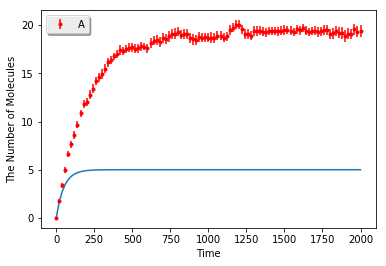

K 5.612310241546865
384
vol 1 1
p 0.11785113019775789
vol 1 2.1722320318050747
p 0.11785113019775789


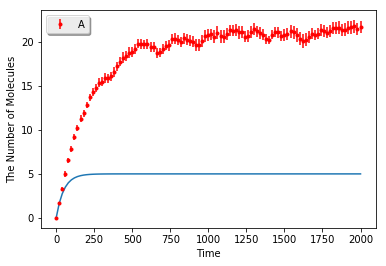

K 11.22462048309373
2352
vol 1 1
p 0.23570226039551578
vol 1 1.6631151493507603
p 0.23570226039551578


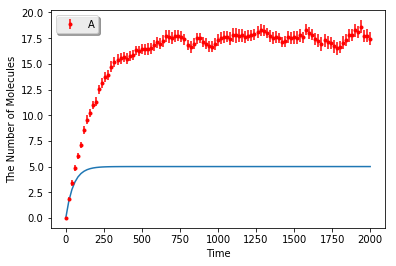

K 18.707700805156218
7920
vol 1 1
p 0.39283710065919303
vol 1 1.2096617127114506
p 0.39283710065919303


KeyboardInterrupt: 

In [3]:
from ecell4 import *
from ecell4.extra import ensemble
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

simrun=50
duration = 2000
#rm = 0.005
D=0.1
Nas = 5
nproc=70
L=1#cbrt(10)
k1=0.02
k2=0.1
method='multiprocessing'
Mean=[]
Ks=[]
rlist=[0.2]#,0.1,0.05,0.03,0.02]#,0.01]
acv=[]
nb=1

for rm in rlist:
    K=2.**(-5./6)*L/rm
    print('K',K)
    shape=tuple(spatiocyte.SpatiocyteWorld.calculate_shape(Real3(L,L,L),rm))
    nv=shape[0]*shape[1]*shape[2]    
    print(nv)
    def singlerun(solver='ode',intrinsic=False,simrun=1):   
        V = L**3 
        M = max(int(min(cbrt(Nas), L / (2 * rm))), 3)
        if solver=='spa':
            solver=("spatiocyte",rm)
            V=spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)
        elif solver=='egfrd':
            solver = ('egfrd', Integer3(M, M, M)) 
        elif solver=='meso':
            solver = ('meso', Integer3(K,K,K),2*rm)             
        acv.append(V)
    
        print('vol',L**3,V)
        p=(k1/2 )/(6*2**0.5 *D*rm )
        print('p',p)
        kd = 4*np.pi*rm*2*D
        #keffr=keff*kd/(keff+kd)   
        #print('keff',keffr)
        with species_attributes():
            A | {'D': D, 'radius':rm}
            E | {'D': 0, 'radius':rm}    
            B | {'D': 0, 'radius':rm}            
            
        with reaction_rules():
            E > A | k2/nv
            #A > E | k1
            A+E>E+A| 6*2**0.5 *D*rm   
            A+B>E+B|k1/2
        m1 = get_model()
        
        with species_attributes():
            A | {'D': D, 'radius':rm}   
            B | {'D': 0, 'radius':rm}             

        with reaction_rules():
            ~A > A | k2
            A > ~A | k1
            #A+B>B |k1
        m2 = get_model()        

        #print('av={:.3},intrinsic={}'.format(float(V),intrinsic))
        #print('kon={:.3},koff={:.3},kd={:.3},keff={:.3},kfactor={:.3}'.format(kon,(ka if intrinsic else keff),kd,keff,ka/kd))
        if simrun >1    :
            obs=ensemble.ensemble_simulations(duration,n=simrun,model=m1,y0={'E':nv-nb,'B':nb},solver=solver,volume=ones()*L,species_list=["A"],return_type='observer',nproc=nproc,method=method)#,return_type="observer")
        else:
            obs=run_simulation(duration,model=m2,return_type='observer',y0={'B':nb},species_list=['A'],solver=solver,volume=ones()*L)
        return obs

    obs1=singlerun('ode',False,1)
    obs2=singlerun('spa',True,simrun)
    #obs3=singlerun('meso',False,simrun)
    #data2 = np.array(obs2.data()).T
    #meana=np.mean(data2[1][50:])
    #print('A',meana)
    #Mean.append(meana)
    Ks.append(K)
    viz.plot_number_observer(obs2,'r.',obs1,'k-')
    #obs3=singlerun('egfrd',True,simrun)
    #obs4=singlerun('gillespie',False,simrun)
    #write('/home/chew/outputdata/sturrock_bd_ode_rm{:.3}_Nas5'.format(rm),obs1)
    #write('/home/chew/outputdata/sturrock_bd_spa_rm{:.3}_Nas5_10k'.format(rm),obs2)
    #write('/home/chew/outputdata/sturrock_bd_egfrd_rm{:.3}_Nas5_10k'.format(rm),obs3)

[4.959137254901961, 5.249039215686274, 5.4920784313725504, 5.6176078431372556, 6.0075098039215682, 6.35007843137255, 7.0679411764705904]
[7.761204030303545, 2.7492311652532964, 2.1722320318050747, 1.8536380004736634, 1.6631151493507603, 1.2096617127114506, 1.1295606565386387]
[1.603517211870533, 3.7415401610312435, 5.612310241546865, 7.015387801933581, 11.22462048309373, 18.707700805156218, 28.061551207734325]
[4.959137254901961, 5.249039215686274, 5.4920784313725504, 5.6176078431372556, 6.0075098039215682, 6.35007843137255, 7.0679411764705904]


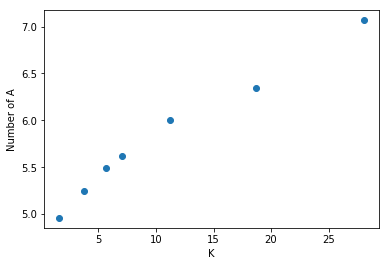

In [29]:
con=[i for i, j in zip(Mean,acv)]
print(Mean)
print(acv)
print(Ks)
print(con)
plt.plot(Ks,con,'o')
plt.xlabel('K')
plt.ylabel('Number of A')

In [9]:
2**(1./6) /10

0.11224620483093731

In [10]:
0.02/0.1/0.11

1.8181818181818181

In [11]:
0.02*10/0.11

1.8181818181818183

In [12]:
L=1.
rm=0.02
spatiocyte.SpatiocyteWorld.calculate_volume(Real3(L,L,L),rm)

1.1295606565386387

In [22]:
0.1*(10**3 -1)/(0.1+0.02)

832.5

In [12]:
1000/8.

125.0